In [1]:
import seaborn
import numpy as np

# Virtual DC/DC converter for methodology testing

In [2]:
class VirtualDCDC():
    '''
    A simulated fixed-frequency synchronous buck converter.
    '''
    
    def __init__(self):
        self.dcr = 0.1  # Ohms
        self.iq = 2.2E-3  # Ampers
        self.set_vout = 5  # Volts
        
        # dimensionless number for the losses that are linearly
        # dependent on the load
        self.switching_losses_factor = 0.04
    
    
    def get_iin(self, vin, iout):
        pout = iout * self.set_vout
        ploss = self.iq * vin + iout * iout * self.dcr + iout * self.set_vout * self.switching_losses_factor
        pin = pout + ploss
        return pin / vin


    
converter = VirtualDCDC()

In [3]:
vin = 12
iout = np.linspace(1E-6, 3, 100)
pout = np.apply_along_axis(lambda x: x * converter.set_vout, 0, iout)
iin = np.apply_along_axis(lambda x: converter.get_iin(vin, x), 0, iout)
pin = np.apply_along_axis(lambda x: x * vin, 0, iin)
efficiency = [100 * pout[idx] / pin[idx] for idx in range(len(pout))]

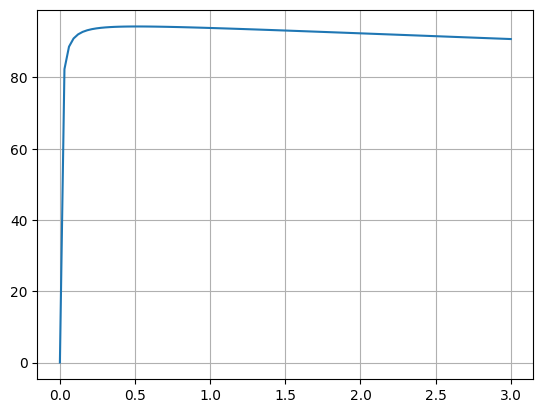

In [4]:
g = seaborn.lineplot(x=iout, y=efficiency)
g.axes.grid(True)
# g.axes.semilogx(True)